In [1]:
import pandas as pd

In [2]:
file = pd.read_csv("data/stepDetector_30min.csv")

In [3]:
file.head()

,Unnamed: 0,experimentid,userid,day,rounded_timestamp,step_count
0,0,wenetItaly,0,20201114,2020-11-14 08:30:00,39
1,1,wenetItaly,0,20201114,2020-11-14 12:00:00,148
2,2,wenetItaly,0,20201115,2020-11-15 09:30:00,5
3,3,wenetItaly,0,20201117,2020-11-17 12:00:00,81
4,4,wenetItaly,0,20201117,2020-11-17 16:30:00,13


In [4]:
file = file.drop("Unnamed: 0", axis=1)
file = file.drop("experimentid", axis=1)
file

,userid,day,rounded_timestamp,step_count
0,0,20201114,2020-11-14 08:30:00,39
1,0,20201114,2020-11-14 12:00:00,148
2,0,20201115,2020-11-15 09:30:00,5
3,0,20201117,2020-11-17 12:00:00,81
4,0,20201117,2020-11-17 16:30:00,13
...,...,...,...,...
22582,265,20201123,2020-11-23 20:30:00,177
22583,265,20201124,2020-11-24 15:30:00,15
22584,265,20201124,2020-11-24 16:30:00,30
22585,265,20201124,2020-11-24 19:00:00,142


In [5]:
file.step_count.max()

4674

In [6]:
file[file['userid'] == 0]

,userid,day,rounded_timestamp,step_count
0,0,20201114,2020-11-14 08:30:00,39
1,0,20201114,2020-11-14 12:00:00,148
2,0,20201115,2020-11-15 09:30:00,5
3,0,20201117,2020-11-17 12:00:00,81
4,0,20201117,2020-11-17 16:30:00,13
5,0,20201117,2020-11-17 17:00:00,11
6,0,20201119,2020-11-19 11:30:00,101
7,0,20201120,2020-11-20 14:00:00,78
8,0,20201121,2020-11-21 09:30:00,51
9,0,20201123,2020-11-23 14:30:00,19


In [7]:
df = file.copy()
daily_step_counts = df.groupby(['userid', 'day'])['step_count'].sum().reset_index().rename(columns={'step_count': 'totale_passi_giornalieri'})

In [8]:
daily_step_counts

,userid,day,totale_passi_giornalieri
0,0,20201114,187
1,0,20201115,5
2,0,20201117,105
3,0,20201119,101
4,0,20201120,78
...,...,...,...
1933,265,20201120,877
1934,265,20201121,155
1935,265,20201122,470
1936,265,20201123,187


<h1>Stato Utente (PA/A/MA) Giorno per Giorno</h1>

In [9]:

media_passi_giornalieri = daily_step_counts['totale_passi_giornalieri'].mean()
mediana_passi_giornalieri = daily_step_counts['totale_passi_giornalieri'].median()

print(mediana_passi_giornalieri)
print(media_passi_giornalieri)

daily_step_counts['stato_utente'] = pd.qcut(daily_step_counts['totale_passi_giornalieri'], q=[0, 0.25, 0.75, 1], labels=['Poco Attivo','Attivo', 'Molto Attivo'])

daily_step_counts


555.5
1576.3199174406604


,userid,day,totale_passi_giornalieri,stato_utente
0,0,20201114,187,Attivo
1,0,20201115,5,Poco Attivo
2,0,20201117,105,Poco Attivo
3,0,20201119,101,Poco Attivo
4,0,20201120,78,Poco Attivo
...,...,...,...,...
1933,265,20201120,877,Attivo
1934,265,20201121,155,Attivo
1935,265,20201122,470,Attivo
1936,265,20201123,187,Attivo


In [10]:
df = daily_step_counts.copy()
df = df.groupby('userid')['totale_passi_giornalieri'].agg(median='median', mean='mean').reset_index()
df

,userid,median,mean
0,0,61.0,72.666667
1,2,662.0,770.428571
2,3,75.0,130.500000
3,8,2791.0,2965.210526
4,10,7.0,7.000000
...,...,...,...
121,256,228.0,1284.904762
122,260,16.0,82.466667
123,262,102.5,1009.800000
124,264,269.0,875.904762


In [12]:
df['stato_utente'] = pd.qcut(df['mean'], q=[0, 0.25, 0.75, 1], labels=['Poco Attivo', 'Attivo', 'Molto Attivo'])

df

,userid,median,mean,stato_utente
0,0,61.0,72.666667,Poco Attivo
1,2,662.0,770.428571,Attivo
2,3,75.0,130.500000,Poco Attivo
3,8,2791.0,2965.210526,Molto Attivo
4,10,7.0,7.000000,Poco Attivo
...,...,...,...,...
121,256,228.0,1284.904762,Attivo
122,260,16.0,82.466667,Poco Attivo
123,262,102.5,1009.800000,Attivo
124,264,269.0,875.904762,Attivo


In [13]:
utenti_stato_dict = dict(zip(df['userid'], df['stato_utente']))

In [14]:
utenti_stato_dict

{0: 'Poco Attivo',
 2: 'Attivo',
 3: 'Poco Attivo',
 8: 'Molto Attivo',
 10: 'Poco Attivo',
 17: 'Attivo',
 18: 'Attivo',
 19: 'Molto Attivo',
 20: 'Attivo',
 22: 'Poco Attivo',
 23: 'Attivo',
 25: 'Poco Attivo',
 26: 'Molto Attivo',
 27: 'Molto Attivo',
 29: 'Attivo',
 32: 'Attivo',
 35: 'Poco Attivo',
 37: 'Poco Attivo',
 41: 'Attivo',
 42: 'Molto Attivo',
 43: 'Molto Attivo',
 45: 'Molto Attivo',
 46: 'Attivo',
 48: 'Attivo',
 58: 'Molto Attivo',
 60: 'Molto Attivo',
 62: 'Attivo',
 63: 'Poco Attivo',
 65: 'Attivo',
 66: 'Attivo',
 67: 'Poco Attivo',
 70: 'Poco Attivo',
 71: 'Poco Attivo',
 72: 'Poco Attivo',
 74: 'Molto Attivo',
 75: 'Attivo',
 77: 'Poco Attivo',
 80: 'Attivo',
 82: 'Poco Attivo',
 83: 'Attivo',
 85: 'Poco Attivo',
 86: 'Poco Attivo',
 88: 'Poco Attivo',
 91: 'Attivo',
 93: 'Poco Attivo',
 95: 'Attivo',
 96: 'Molto Attivo',
 97: 'Attivo',
 100: 'Molto Attivo',
 103: 'Attivo',
 105: 'Molto Attivo',
 106: 'Attivo',
 107: 'Molto Attivo',
 109: 'Molto Attivo',
 114: 'A

In [15]:
clusters = pd.read_csv("data/clusters.csv")

In [16]:
clusters = clusters.drop("Unnamed: 0", axis=1)
clusters


,userid,cluster
0,0,0
1,1,1
2,10,0
3,100,0
4,101,0
...,...,...
244,95,1
245,96,0
246,97,0
247,98,3


In [17]:
dizionario = utenti_stato_dict.copy()
df_tabella = clusters.copy()

df_dizionario = pd.DataFrame(list(dizionario.items()), columns=['userid', 'stato_utente'])

df_finale = pd.merge(df_tabella, df_dizionario, on='userid', how='left')

In [18]:
df_finale

,userid,cluster,stato_utente
0,0,0,Poco Attivo
1,1,1,NaN
2,10,0,Poco Attivo
3,100,0,Molto Attivo
4,101,0,NaN
...,...,...,...
244,95,1,Attivo
245,96,0,Molto Attivo
246,97,0,Attivo
247,98,3,NaN


In [19]:
df_finale = df_finale.dropna()

In [20]:
df_finale

,userid,cluster,stato_utente
0,0,0,Poco Attivo
2,10,0,Poco Attivo
3,100,0,Molto Attivo
6,103,3,Attivo
8,105,3,Molto Attivo
...,...,...,...
240,91,3,Attivo
242,93,1,Poco Attivo
244,95,1,Attivo
245,96,0,Molto Attivo


In [21]:
df_finale['stato_utente'] = df_finale['stato_utente'].replace(['Poco Attivo', 'Attivo', 'Molto Attivo'],['Not Active','Active','Very Active'])
tabella_contingenza = pd.crosstab(df_finale['cluster'], df_finale['stato_utente'])

print("Tabella di contingenza:")
print(tabella_contingenza)

Tabella di contingenza:
stato_utente  Active  Not Active  Very Active
cluster                                      
0                 16          10           10
1                 12          10            8
2                  9           3            7
3                 24           8            7


C:\Users\chemo\AppData\Local\Temp\ipykernel_7748\2079466995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finale['stato_utente'] = df_finale['stato_utente'].replace(['Poco Attivo', 'Attivo', 'Molto Attivo'],['Not Active','Active','Very Active'])


In [30]:
tmp_df = pd.read_csv("data/sport_step_clusters.csv")
tmp_df = tmp_df.dropna()
tmp_df = tmp_df.drop("Unnamed: 0", axis=1)
tmp_df

,userid,step activity,sport activity
0,0,not very active,active
2,10,not very active,active
3,100,very active,active
6,103,active,active
8,105,very active,active
...,...,...,...
240,91,very active,active
242,93,not very active,active
244,95,not very active,active
245,96,very active,inactive


In [21]:
utenti_stato_dict2 = dict(zip(tmp_df['userid'], tmp_df['sport activity']))
df_dizionario2 = pd.DataFrame(list(utenti_stato_dict2.items()), columns=['userid', 'sport activity'])
df_finale2 = pd.merge(df_tabella, df_dizionario2, on='userid', how='left')

In [22]:
tabella_contingenza2 = pd.crosstab(df_finale['cluster'], df_finale2['sport activity'])

print("Tabella di contingenza:")
print(tabella_contingenza2)

df_nuovo = pd.merge(df, df_tabella, on='userid', how='left')
df_nuovo
df = df_nuovo.copy()

Tabella di contingenza:
sport activity  active  inactive
cluster                         
0                   28         8
1                   24         6
2                   16         3
3                   28        11


In [22]:
df['stato_utente'] = df['stato_utente'].replace(['Poco Attivo', 'Attivo', 'Molto Attivo'],['Not Active','Active','Very Active'])

In [24]:
new_table = df.groupby('userid')['totale_passi_giornalieri'].agg(median='median', mean='mean').reset_index()
new_table = pd.merge(new_table, df_finale, on='userid', how='left')
new_table

,userid,median,mean
0,0,61.0,72.666667
1,2,662.0,770.428571
2,3,75.0,130.500000
3,8,2791.0,2965.210526
4,10,7.0,7.000000
...,...,...,...
121,256,228.0,1284.904762
122,260,16.0,82.466667
123,262,102.5,1009.800000
124,264,269.0,875.904762


In [23]:
df

,userid,median,mean,stato_utente
0,0,61.0,72.666667,Not Active
1,2,662.0,770.428571,Active
2,3,75.0,130.500000,Not Active
3,8,2791.0,2965.210526,Very Active
4,10,7.0,7.000000,Not Active
...,...,...,...,...
121,256,228.0,1284.904762,Active
122,260,16.0,82.466667,Not Active
123,262,102.5,1009.800000,Active
124,264,269.0,875.904762,Active


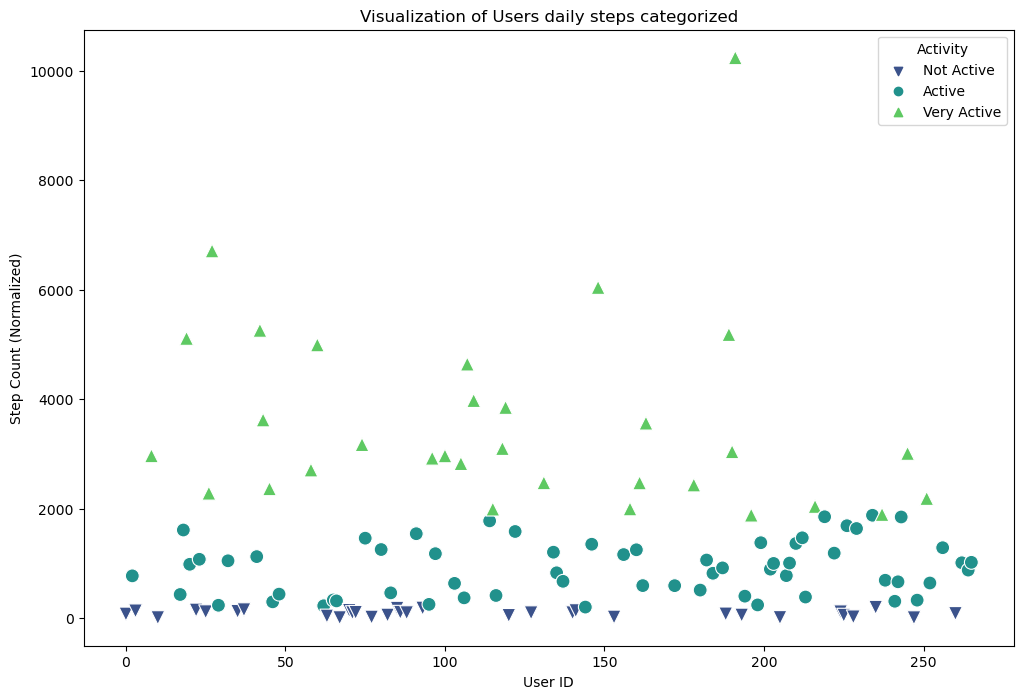

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


mediana_passi_giornalieri = df['mean'].median() / df['mean'].max()

df['totale_passi_normalized'] = df['mean'] / df['mean'].max()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='userid', y='mean', hue='stato_utente', style='stato_utente', markers={'Active': 'o', 'Not Active': 'v', 'Very Active': '^'}, data=df, palette='viridis', s=100)

plt.title('Visualization of Users daily steps categorized')
plt.xlabel('User ID')
plt.ylabel('Step Count (Normalized)')
plt.legend(title='Activity', loc='upper right')

plt.show()

In [30]:
print("VERY ACTIVE")
print(df[df['stato_utente']=="Very Active"]['mean'].describe())

print("ACTIVE")
print(df[df['stato_utente']=="Active"]['mean'].describe())

print("NOT ACTIVE")
print(df[df['stato_utente']=="Not Active"]['mean'].describe())


VERY ACTIVE
count       32.000000
mean      3558.185307
std       1767.296230
min       1880.150000
25%       2414.246154
50%       2986.748120
75%       4140.955263
max      10238.450000
Name: mean, dtype: float64
ACTIVE
count      62.000000
mean      914.637253
std       487.873842
min       200.050000
25%       442.497059
50%       904.525000
75%      1250.275000
max      1877.692308
Name: mean, dtype: float64
NOT ACTIVE
count     32.000000
mean      86.286085
std       55.471875
min        5.500000
25%       44.470982
50%       96.300000
75%      124.125000
max      196.111111
Name: mean, dtype: float64


In [34]:
file
df_steps = file.copy()
df_steps = df_steps.drop("day", axis=1)
df_steps

,userid,rounded_timestamp,step_count
0,0,2020-11-14 08:30:00,39
1,0,2020-11-14 12:00:00,148
2,0,2020-11-15 09:30:00,5
3,0,2020-11-17 12:00:00,81
4,0,2020-11-17 16:30:00,13
...,...,...,...
22582,265,2020-11-23 20:30:00,177
22583,265,2020-11-24 15:30:00,15
22584,265,2020-11-24 16:30:00,30
22585,265,2020-11-24 19:00:00,142


In [31]:
df_sport_sessions = pd.read_csv("data/sport_activities_last.csv")
df_sport_sessions = df_sport_sessions.drop("DD_not", axis=1)
df_sport_sessions = df_sport_sessions.drop("Unnamed: 0", axis=1)
df_sport_sessions.rename(columns={"id": "userid"}, inplace=True)
df_sport_sessions


,userid,start_time,end_time,sport recoded
0,0,2020-11-14 10:30:00,2020-11-14 14:00:00,Walking
1,0,2020-11-15 10:00:00,2020-11-15 13:30:00,Walking
2,0,2020-11-19 10:00:00,2020-11-19 11:00:00,Outdoor activities
3,0,2020-11-21 13:00:00,2020-11-21 13:30:00,Walking
4,0,2020-11-26 16:00:00,2020-11-26 17:30:00,Walking
...,...,...,...,...
1028,265,2020-11-19 11:30:00,2020-11-19 18:30:00,Walking
1029,265,2020-11-20 17:00:00,2020-11-20 17:30:00,Walking
1030,265,2020-11-21 16:30:00,2020-11-21 18:30:00,Walking
1031,265,2020-11-22 15:30:00,2020-11-22 17:30:00,Walking


In [35]:
import pandas as pd

df_sport_sessions['start_time'] = pd.to_datetime(df_sport_sessions['start_time'])
df_sport_sessions['end_time'] = pd.to_datetime(df_sport_sessions['end_time'])
df_steps['rounded_timestamp'] = pd.to_datetime(df_steps['rounded_timestamp'])

# Merge the two datasets based on 'userid' and 'rounded_timestamp'
merged_df = pd.merge_asof(
    df_steps.sort_values('rounded_timestamp'),
    df_sport_sessions.sort_values('start_time'),
    by='userid',
    left_on='rounded_timestamp',
    right_on='start_time',
)

# Filter steps within each sport session
steps_in_session = merged_df[
    (merged_df['rounded_timestamp'] >= merged_df['start_time']) &
    (merged_df['rounded_timestamp'] <= merged_df['end_time'])
]

# Calculate the total steps for each sport session
total_steps_per_session = steps_in_session.groupby(['userid', 'start_time', 'end_time', 'sport recoded'])['step_count'].sum().reset_index()

# Merge the total steps back to the original sport sessions dataset
final_df = pd.merge(df_sport_sessions, total_steps_per_session, on=['userid', 'start_time', 'end_time', 'sport recoded'], how='left')

# Fill NaN values with 0 (for sport sessions with no steps)
final_df['step_count'] = final_df['step_count'].fillna(0)

# Display the final DataFrame
final_df



      userid          start_time            end_time           sport recoded  \
0          0 2020-11-14 10:30:00 2020-11-14 14:00:00                 Walking   
1          0 2020-11-15 10:00:00 2020-11-15 13:30:00                 Walking   
2          0 2020-11-19 10:00:00 2020-11-19 11:00:00      Outdoor activities   
3          0 2020-11-21 13:00:00 2020-11-21 13:30:00                 Walking   
4          0 2020-11-26 16:00:00 2020-11-26 17:30:00                 Walking   
...      ...                 ...                 ...                     ...   
1028     265 2020-11-19 11:30:00 2020-11-19 18:30:00                 Walking   
1029     265 2020-11-20 17:00:00 2020-11-20 17:30:00                 Walking   
1030     265 2020-11-21 16:30:00 2020-11-21 18:30:00                 Walking   
1031     265 2020-11-22 15:30:00 2020-11-22 17:30:00                 Walking   
1032     266 2020-11-17 08:30:00 2020-11-17 09:00:00  Gymnastics and fitness   

      step_count  
0          148.0  
1

<h1>PERCENTUALE DI SESSIONI CON 0 STEPS</h1>

In [47]:
percentage_zero_steps = (final_df['step_count']==0.0).mean() * 100

In [48]:
percentage_zero_steps

64.95643756050339

<h1>NUMERO SESSIONI CON 0 STEPS PER TIPO DI SPORT</h1>

In [45]:
zero_steps_by_activity = final_df.groupby('sport recoded')['step_count'].apply(lambda x: (x == 0.0).count()).reset_index()

In [46]:
zero_steps_by_activity

,sport recoded,step_count
0,Gymnastics and fitness,311
1,Jogging and running,72
2,Other indoor activities,89
3,Outdoor activities,34
4,Walking,471
5,"Walking, Trekking, and hiking",42


In [51]:
df_finale

,userid,cluster,stato_utente
0,0,0,Not Active
2,10,0,Not Active
3,100,0,Very Active
6,103,3,Active
8,105,3,Very Active
...,...,...,...
240,91,3,Active
242,93,1,Not Active
244,95,1,Active
245,96,0,Very Active


<h1>TEST DI SIGNIFICATIVITA</h1>

In [52]:
nuovodf2 = df_finale[['cluster','stato_utente']]

In [57]:
from scipy.stats import chi2_contingency
df = nuovodf2.copy()
# Creare una tabella di contingenza
contingency_table = pd.crosstab(df['cluster'], df['stato_utente'])

# Eseguire il test del Chi-quadro
chi2, p, _, _ = chi2_contingency(contingency_table)

# Valutare la significatività
alpha = 0.05
if p < alpha:
    print("La differenza è significativa. Si rigetta l'ipotesi nulla.")
else:
    print("Non c'è evidenza sufficiente per rigettare l'ipotesi nulla.")
print(p)

Non c'è evidenza sufficiente per rigettare l'ipotesi nulla.
0.45792742845108814


In [58]:
from scipy.stats import ttest_ind

# Dividere i dati in due gruppi
group1 = df[df['stato_utente'] == 'Active']['cluster']
group2 = df[df['stato_utente'] == 'Not Active']['cluster']
group3 = df[df['stato_utente'] == 'Very Active']['cluster']

# Eseguire il test t di Student
t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

# Valutare la significatività
alpha = 0.05
if p_value < alpha:
    print("La differenza è significativa. Si rigetta l'ipotesi nulla.")
else:
    print("Non c'è evidenza sufficiente per rigettare l'ipotesi nulla.")
print(p_value)

Non c'è evidenza sufficiente per rigettare l'ipotesi nulla.
0.1571314316316877


In [59]:
from scipy.stats import f_oneway

# Eseguire l'ANOVA
groups = [df[df['stato_utente'] == category]['cluster'] for category in df['stato_utente'].unique()]
f_stat, p_value = f_oneway(*groups)

# Valutare la significatività
alpha = 0.05
if p_value < alpha:
    print("Almeno una coppia di gruppi è significativamente diversa. Si rigetta l'ipotesi nulla.")
else:
    print("Non c'è evidenza sufficiente per rigettare l'ipotesi nulla.")
print(p)

Non c'è evidenza sufficiente per rigettare l'ipotesi nulla.
0.45792742845108814
